## MSDS: 7337 - Natural Language Processing
**Author: Trace Smith**
**Homework Assignment: 6**
________

In [43]:
# Python Libraries
import seaborn as sns;print("Seaborn",sns.__version__)
import matplotlib; print("Matplitlib",matplotlib.__version__)
import matplotlib.pyplot as plt
import sklearn;print('Sklearn',sklearn.__version__)
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

Seaborn 0.7.1
Matplitlib 1.5.3
Sklearn 0.20.3


#1 **Evaluate text similarity of Amazon book search results by doing the following:** 
- a. Do a book search on Amazon. Manually copy the full book title (including subtitle) of each of the top 24 books listed in the first two pages of search results. 
- b. In Python, run one of the text-similarity measures covered in this course, e.g., cosine similarity. Compare each of the book titles, pairwise, to every other one. Which two titles are the most similar to each other? Which are the most dissimilar? - Where do they rank, among the first 24 results?

In [48]:
# Amazon Best Sellers of 2018
books = [
"Becoming",
"Girl, Wash Your Face: Stop Believing the Lies About Who You Are so You Can Become Who You Were Meant to Be",
"The Wonky Donkey",
"Fire and Fury: Inside the Trump White House",
"Fear: Trump in the White House",
"Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book, LGBT Children's Book)",
"12 Rules for Life: An Antidote to Chaos",
"Magnolia Table: A Collection of Recipes for Gathering",
"Whose Boat Is This Boat?: Comments That Don't Help in the Aftermath of a Hurricane",
"The Subtle Art of Not Giving: A Counterintuitive Approach to Living a Good Life",
"A Higher Loyalty: Truth, Lies, and Leadership",
"The Complete Ketogenic Diet for Beginners: Your Essential Guide to Living the Keto Lifestyle",
"Diary of a Wimpy Kid #13: Meltdown",
"The 5 Love Languages: The Secret to Love that Lasts",
"First 100 Words",
"Dog Man: Lord of the Fleas: From the Creator of Captain Underpants (Dog Man #5)",
"Educated: A Memoir",
"You Are a: How to Stop Doubting Your Greatness and Start Living an Awesome Life",
"The Plant Paradox: The Hidden Dangers in 'Healthy' Foods That Cause Disease and Weight Gain",
"Giraffes Can't Dance",
"Player's Handbook (Dungeons & Dragons)",
"Homebody: A Guide to Creating Spaces You Never Want to Leave",
"The Very Hungry Caterpillar",
"Crazy Rich Asians (Crazy Rich Asians Trilogy)"
]

In [92]:
def pairwise_plot(s):

    fig,ax = plt.subplots(figsize=(10,6))
    ax = sns.heatmap(s,cmap="Blues",vmin=0, vmax=0.50)
    ax.set_xlabel('Books')
    ax.set_ylabel('Books')
    ax.set_title('Cosine Similarity Matrix',fontsize=24)    
    
def get_tfidf(input):
    tokenize = lambda doc: doc.lower().split(" ")
    sklearn_tfidf = TfidfVectorizer(norm='l2',
                                min_df=0, 
                                use_idf=True, 
                                smooth_idf=False, 
                                sublinear_tf=True, 
                                tokenizer=tokenize)
    tfidf = sklearn_tfidf.fit_transform(input)
    return tfidf

if __name__ == '__main__':
    
    tfidf = get_tfidf(books)
    s = cosine_similarity(tfidf,tfidf)

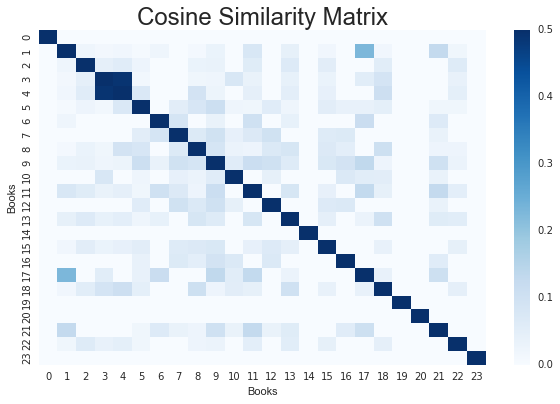

In [93]:
pairwise_plot(s)

For this question, we will take a look at computing the cosine similarity to determine how similar or dissimilar the top 2018 books ranked on Amazon. Cosine similarity calculates similarity by measuring the cosine of angle between two vectors.

In the heatmap plot above, we can see that the two books which are the most similar are "Fire and Fury: Inside the Trump White House" and "Fear: Trump in the White House". The cosine similarity for these two books are 0.49. On the other hand, there are quite a few books that are not similar and thus have a cosine similarity of zero, for instance: "The Very Hungry Caterpillar" and "Becoming". In terms of ranking, the most similar books are #4 and #5 while one of the most dissimilar books is ranked #1 and #23, respectively. 

** 2.) Now evaluate using a major search engine.**
- a.	Enter one of the book titles from question 1a into Google, Bing, or Yahoo!. Copy the capsule of the first organic result and the 20th organic result. Take web results only (i.e., not video results), and skip sponsored results. 
- b.	Run the same text similarity calculation that you used for question 1b on each of these capsules in comparison to the original query (book title). 
- c.	Which one has the highest similarity measure? 
Submit all of your inputs and outputs and your code for this assignment, along with a brief written explanation of your findings. 


In [80]:
# Entered the following book into Google
book_ = ["Whose Boat Is This Boat?: Comments That Don't Help in the Aftermath of a Hurricane"]

In [74]:
capsule = ["Editorial Reviews. About the Author. The Staff of The Late Show are bipedal mammals. ... Boat Is This Boat?: Comments That Don't Help in the Aftermath of a Hurricane eBook: The Staff of The Late Show with Stephen Colbert: Kindle Store",
          "Colbert and his writing staff composed the book Whose Boat Is This Boat? Comments That Don't Help in the Aftermath of a Hurricane'It uses"
          ]

In [89]:
tfidf = get_tfidf(book_ + [capsule[0]])
s = cosine_similarity(tfidf,tfidf)
print('Cosine Similarity between the Book and Google Capsule #1:',s[1][0])

Cosine Similarity between the Book and Google Capsule #1: 0.4359729799427061


In [91]:
tfidf = get_tfidf(book_ + [capsule[1]])
s = cosine_similarity(tfidf,tfidf)
print('Cosine Similarity between the Book and Google Capsule #2:',s[1][0])

Cosine Similarity between the Book and Google Capsule #2: 0.47948881986856745


For this example, the cosine similarity for the first response returned from Google actually cuts some of the title from the capsule returned. As we can see from the two scores, the cosine similarity for the first capsule returned and the book "Whose Boat Is This Boat?: Comments That Don't Help in the Aftermath of a Hurricane" is 0.43. The cosine similarity for the same book the and the 20th capsule returned is slightly better with a value of 0.479. As mentioned with the complete title being truncated in the first capsule would explain the lower similarity value. Also, given this is a fairly popular book (e.g. #9 Ranked Book on Amazon for 2018) the expected matches returned from Google would be relatively high. 